In [279]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('bundesliga-2009-2018_clean.csv')
df_2 = pd.read_csv('zweite-liga-2009-2018_clean.csv')

In [3]:
df = pd.concat([df, df_2])

In [4]:
df.head()

,Unnamed: 0,competition,date,gameday,guest_coach,guest_game_system,guest_team_id,guest_team_name,home_coach,home_game_system,...,home_team_name,identifier,result,saison,time,viewers,weekday,day,month,year
0,0,Bundesliga,2009-07-18 19:30:00,1,Paul Gludovatz,5-4-1,266,SV Ried,Werner Gregoritsch,4-5-1,...,SV Kapfenberg,0d35ff9a835d4ed24af193dbcaa0a5b7a48210bfe36dba...,0:1,2009/10,19:30,3450,5,18,7,2009
1,1,Bundesliga,2009-07-25 19:30:00,2,Huub Stevens,4-4-2 Raute,409,Red Bull Salzburg,Paul Gludovatz,5-4-1,...,SV Ried,81225b68d59aa35cdc85291ea79a6b93d179a441e752e3...,1:0,2009/10,19:30,7600,5,25,7,2009
2,2,Bundesliga,2009-07-31 20:30:00,3,Paul Gludovatz,5-4-1,266,SV Ried,Helmut Kraft,4-4-2,...,SC Wiener Neustadt,d8198d9be005849cc4cc3ec5f1c0cd99ebe0b84c26fc38...,2:1,2009/10,20:30,2700,4,31,7,2009
3,3,Bundesliga,2009-08-09 19:30:00,4,Peter Pacult,4-4-2 doppel 6,170,SK Rapid Wien,Paul Gludovatz,5-4-1,...,SV Ried,164564f0839d4a5d277ba006596369919e4717e5950fd1...,1:1,2009/10,19:30,7600,6,9,8,2009
4,4,Bundesliga,2009-08-21 20:30:00,5,Paul Gludovatz,3-4-2-1,266,SV Ried,Frenkie Schinkels,4-5-1,...,SK Austria Kärnten,26596f43388b43546a5014d869f60e0165adb51df66464...,0:0,2009/10,20:30,5079,4,21,8,2009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 0 to 2557
Data columns (total 21 columns):
Unnamed: 0           5067 non-null int64
competition          5067 non-null object
date                 5067 non-null object
gameday              5067 non-null object
guest_coach          4608 non-null object
guest_game_system    4605 non-null object
guest_team_id        5067 non-null int64
guest_team_name      5067 non-null object
home_coach           4247 non-null object
home_game_system     4243 non-null object
home_team_id         5067 non-null int64
home_team_name       5067 non-null object
identifier           5067 non-null object
result               5067 non-null object
saison               5067 non-null object
time                 5067 non-null object
viewers              5067 non-null int64
weekday              5067 non-null int64
day                  5067 non-null int64
month                5067 non-null int64
year                 5067 non-null int64
dtypes: int64(8), o

In [6]:
df.home_team_id.head()

0     2394
1      266
2    17444
3      266
4    11609
Name: home_team_id, dtype: int64

In [7]:
df[df.viewers == 11422]

,Unnamed: 0,competition,date,gameday,guest_coach,guest_game_system,guest_team_id,guest_team_name,home_coach,home_game_system,...,home_team_name,identifier,result,saison,time,viewers,weekday,day,month,year
120,134,Bundesliga,2009-08-01 19:30:00,3,Matthias Hamann,4-4-2,413,LASK,Huub Stevens,4-5-1,...,Red Bull Salzburg,a2972fa1a656af76374517bb92fe5e42cd5306841e247e...,3:2,2009/10,19:30,11422,5,1,8,2009


In [8]:
try:
    df = df.drop('Unnamed: 0', axis=1)
except: KeyError
    
try:
    df = df.drop('index', axis=1)
except: KeyError
    
df.head()

,competition,date,gameday,guest_coach,guest_game_system,guest_team_id,guest_team_name,home_coach,home_game_system,home_team_id,home_team_name,identifier,result,saison,time,viewers,weekday,day,month,year
0,Bundesliga,2009-07-18 19:30:00,1,Paul Gludovatz,5-4-1,266,SV Ried,Werner Gregoritsch,4-5-1,2394,SV Kapfenberg,0d35ff9a835d4ed24af193dbcaa0a5b7a48210bfe36dba...,0:1,2009/10,19:30,3450,5,18,7,2009
1,Bundesliga,2009-07-25 19:30:00,2,Huub Stevens,4-4-2 Raute,409,Red Bull Salzburg,Paul Gludovatz,5-4-1,266,SV Ried,81225b68d59aa35cdc85291ea79a6b93d179a441e752e3...,1:0,2009/10,19:30,7600,5,25,7,2009
2,Bundesliga,2009-07-31 20:30:00,3,Paul Gludovatz,5-4-1,266,SV Ried,Helmut Kraft,4-4-2,17444,SC Wiener Neustadt,d8198d9be005849cc4cc3ec5f1c0cd99ebe0b84c26fc38...,2:1,2009/10,20:30,2700,4,31,7,2009
3,Bundesliga,2009-08-09 19:30:00,4,Peter Pacult,4-4-2 doppel 6,170,SK Rapid Wien,Paul Gludovatz,5-4-1,266,SV Ried,164564f0839d4a5d277ba006596369919e4717e5950fd1...,1:1,2009/10,19:30,7600,6,9,8,2009
4,Bundesliga,2009-08-21 20:30:00,5,Paul Gludovatz,3-4-2-1,266,SV Ried,Frenkie Schinkels,4-5-1,11609,SK Austria Kärnten,26596f43388b43546a5014d869f60e0165adb51df66464...,0:0,2009/10,20:30,5079,4,21,8,2009


In [9]:
columns = [
    'competition', 'saison', 'gameday', 'date',
    'home_team_name', 'guest_team_name', 'result',
    'home_coach', 'home_game_system', 'home_team_id',
    'guest_coach', 'guest_game_system', 'guest_team_id',
    'time', 'viewers', 'weekday', 'day', 'month', 'year',
    'identifier'
]

In [10]:
df.columns

Index(['competition', 'date', 'gameday', 'guest_coach', 'guest_game_system',
       'guest_team_id', 'guest_team_name', 'home_coach', 'home_game_system',
       'home_team_id', 'home_team_name', 'identifier', 'result', 'saison',
       'time', 'viewers', 'weekday', 'day', 'month', 'year'],
      dtype='object')

In [11]:
len(columns), len(df.columns)

(20, 20)

In [12]:
df = df[columns]

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.date.dt.month.head()

0    7
1    7
2    7
3    8
4    8
Name: date, dtype: int64

In [15]:
df.iloc[115:125]

,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_game_system,home_team_id,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,identifier
115,Bundesliga,2009/10,33,2010-05-01 18:00:00,SV Mattersburg,SK Austria Kärnten,1:1,Franz Lederer,4-4-2,856,Joze Prelogar,4-5-1,11609,18:00,2000,5,1,5,2010,df5b434b146e859054d6443d8011d2c02b8b024cdf6975...
116,Bundesliga,2009/10,35,2010-05-09 16:00:00,LASK,SV Mattersburg,2:0,Helmut Kraft,4-4-2 doppel 6,413,Franz Lederer,4-5-1,856,16:00,6000,6,9,5,2010,aeac7a4accdd0f86419cae3358cbb3c8bafb184ecdb0f8...
117,Bundesliga,2009/10,36,2010-05-13 16:00:00,SV Mattersburg,SK Rapid Wien,1:3,Franz Lederer,4-4-2,856,Peter Pacult,4-4-2,170,16:00,13400,3,13,5,2010,2aa1150d8befc79c860d2acc185689fb04c7ab2e2cf4fd...
118,ÖFB-Cup,2009/10,1.Runde,2009-08-14 19:00:00,FC Admira Wacker Mödling II,SV Mattersburg,2:0,NaN,NaN,4375,Franz Lederer,4-4-2,856,19:00,200,4,14,8,2009,a07da242f7d4ddde158275e52afa8e45d47e2627bd30d1...
119,Bundesliga,2009/10,2,2009-07-24 20:30:00,LASK,FK Austria Wien,4:5,Matthias Hamann,4-4-2 Raute,413,Karl Daxbacher,4-4-2 Raute,14,20:30,9400,4,24,7,2009,35ef031088961a69216fe67b446ee703664e57718b9b3a...
120,Bundesliga,2009/10,3,2009-08-01 19:30:00,Red Bull Salzburg,LASK,3:2,Huub Stevens,4-5-1,409,Matthias Hamann,4-4-2,413,19:30,11422,5,1,8,2009,a2972fa1a656af76374517bb92fe5e42cd5306841e247e...
121,Bundesliga,2009/10,4,2009-08-07 20:30:00,LASK,SV Kapfenberg,4:0,Matthias Hamann,4-4-2,413,Werner Gregoritsch,4-4-2,2394,20:30,7300,4,7,8,2009,98842da3edb1c857f45701450924e8f656adc4cd65acd4...
122,Bundesliga,2009/10,5,2009-08-23 19:30:00,SK Rapid Wien,LASK,4:1,Peter Pacult,4-4-2 doppel 6,170,Matthias Hamann,4-4-2 Raute,413,19:30,17100,6,23,8,2009,014bae8a63f5e04d6cf566aadca90cfaa203e1fbb72827...
123,Bundesliga,2009/10,6,2009-08-30 19:30:00,LASK,SC Wiener Neustadt,4:2,Matthias Hamann,4-4-2 Raute,413,Helmut Kraft,4-4-2,17444,19:30,8100,6,30,8,2009,64d4ae8848d45957917021463ab8cb459cbba47c3fa49a...
124,Bundesliga,2009/10,8,2009-09-23 19:30:00,LASK,SK Austria Kärnten,3:1,Matthias Hamann,4-4-2 Raute,413,Frenkie Schinkels,3-4-2-1,11609,19:30,8100,2,23,9,2009,160797d9ca34c19659d2099ed8eacb416b010f4cf5e780...


In [16]:
df = df.sort_values(by='date')
df = df.reset_index()

In [17]:
df.head()

,index,competition,saison,gameday,date,home_team_name,guest_team_name,result,home_coach,home_game_system,...,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,identifier
0,0,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Gratkorn,First Vienna FC,1:1,Michael Fuchs †,4-4-2,...,Peter Stöger,3-4-2-1,2364,19:00,1000,1,14,7,2009,4c0f0ae86edebb6bcc1ad9c5d833e0055eea9911b86e5a...
1,36,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,2:1,Walter Kogler,4-4-2,...,Niko Kovac,3-5-2,6227,19:00,4500,1,14,7,2009,770ca276a4e39c8c7d48039d26db191013bb1edb89e11f...
2,183,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Austria Lustenau,FK Austria Wien Amateure,1:0,Edmund Stöhr,4-4-2,...,Johann Dihanich,4-4-2 Raute,4383,19:00,1300,1,14,7,2009,1ebc796f6e71b70d1d8e317571525b497375957282b533...
3,69,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Rheindorf Altach,TSV Hartberg,4:0,Adi Hütter,4-4-2,...,Bruno Friesenbichler,4-5-1,4467,19:00,5500,1,14,7,2009,0c1d6b332d513d5100a3b95c918abfb51a3ced2a5f0af3...
4,97,2. Liga,2009/10,1,2009-07-14 19:00:00,SKN St. Pölten,FC Dornbirn,2:0,Martin Scherb,4-4-2,...,Armand Benneker,4-5-1,7448,19:00,1200,1,14,7,2009,fdad59fd80b2ca7eeba8afad9412a5ec712c9755657cd9...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 21 columns):
index                5067 non-null int64
competition          5067 non-null object
saison               5067 non-null object
gameday              5067 non-null object
date                 5067 non-null datetime64[ns]
home_team_name       5067 non-null object
guest_team_name      5067 non-null object
result               5067 non-null object
home_coach           4247 non-null object
home_game_system     4243 non-null object
home_team_id         5067 non-null int64
guest_coach          4608 non-null object
guest_game_system    4605 non-null object
guest_team_id        5067 non-null int64
time                 5067 non-null object
viewers              5067 non-null int64
weekday              5067 non-null int64
day                  5067 non-null int64
month                5067 non-null int64
year                 5067 non-null int64
identifier           5067 non-null object
dtypes: dat

In [19]:
df.guest_coach.value_counts(dropna=False).head()

NaN                    459
Karl Daxbacher         187
Dietmar Kühbauer       149
Franco Foda            146
Heimo Pfeifenberger    137
Name: guest_coach, dtype: int64

In [20]:
df = df.fillna('?')

In [21]:
df.isna().sum().sum()

0

In [22]:
df.weekday = df.weekday.astype(str)
df.day = df.day.astype(str)
df.month = df.month.astype(str)
df.year = df.year.astype(str)

In [23]:
df.guest_coach.value_counts(dropna=False).head()

?                      459
Karl Daxbacher         187
Dietmar Kühbauer       149
Franco Foda            146
Heimo Pfeifenberger    137
Name: guest_coach, dtype: int64

In [24]:
df.result[df.result.str.contains('E')] = '1:1'

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.result = df.result.str.slice(stop=3)

In [26]:
len(df[df.result.str.contains('V')]), len(df[df.result.str.contains('E')]), len(df[df.result.str.contains('n')])

(0, 0, 0)

In [27]:
goals = pd.DataFrame()

goals['date'] = df['date'].dt.date
goals['home_team_id'] = df['home_team_id']
goals['guest_team_id'] = df['guest_team_id']

goals['home_goals'] = df.result.str.slice(stop=1)
goals['guest_goals'] = df.result.str.slice(start=2)


goals.home_team_id = goals.home_team_id
goals.guest_team_id = pd.to_numeric(goals.guest_team_id)
goals.home_goals = pd.to_numeric(goals.home_goals)
goals.guest_goals = pd.to_numeric(goals.guest_goals)

goals.shape

(5067, 5)

In [28]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 5 columns):
date             5067 non-null object
home_team_id     5067 non-null int64
guest_team_id    5067 non-null int64
home_goals       5067 non-null int64
guest_goals      5067 non-null int64
dtypes: int64(4), object(1)
memory usage: 198.0+ KB


In [29]:
goals.head()

,date,home_team_id,guest_team_id,home_goals,guest_goals
0,2009-07-14,5192,2364,1,1
1,2009-07-14,2444,6227,2,1
2,2009-07-14,541,4383,1,0
3,2009-07-14,3551,4467,4,0
4,2009-07-14,2662,7448,2,0


In [173]:
goals.to_csv('goals.csv')

In [282]:
goals_prep = pd.read_csv('goals-preprocessed.csv', sep='\t')

In [283]:
goals_prep.head()

,home_team_break,guest_team_break,date,home_team_id,guest_team_id,home_goals,guest_goals,homeResultFactor,guestResultFactor,resultNumeric,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,0,0,14.07.2009,5192,2364,1,1,U,U,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40008,40008,14.07.2009,2444,6227,2,1,S,N,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40008,40008,14.07.2009,541,4383,1,0,S,N,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40008,40008,14.07.2009,3551,4467,4,0,S,N,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40008,40008,14.07.2009,2662,7448,2,0,S,N,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
goals_prep = goals_prep.drop(
    [
    'home_team_id', 'guest_team_id',
    'home_goals', 'guest_goals',
    'homeResultFactor', 'guestResultFactor',
    'date'
    ]
    ,axis=1)

In [285]:
goals_prep.head()

,home_team_break,guest_team_break,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40008,40008,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40008,40008,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40008,40008,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40008,40008,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
df_final = pd.concat([df.drop(['result', 'identifier', 'index'], axis=1), goals_prep], axis=1)

In [287]:
df_final.head()

,competition,saison,gameday,date,home_team_name,guest_team_name,home_coach,home_game_system,home_team_id,guest_coach,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Gratkorn,First Vienna FC,Michael Fuchs †,4-4-2,5192,Peter Stöger,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2. Liga,2009/10,1,2009-07-14 19:00:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,Walter Kogler,4-4-2,2444,Niko Kovac,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Austria Lustenau,FK Austria Wien Amateure,Edmund Stöhr,4-4-2,541,Johann Dihanich,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2. Liga,2009/10,1,2009-07-14 19:00:00,SC Rheindorf Altach,TSV Hartberg,Adi Hütter,4-4-2,3551,Bruno Friesenbichler,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2. Liga,2009/10,1,2009-07-14 19:00:00,SKN St. Pölten,FC Dornbirn,Martin Scherb,4-4-2,2662,Armand Benneker,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


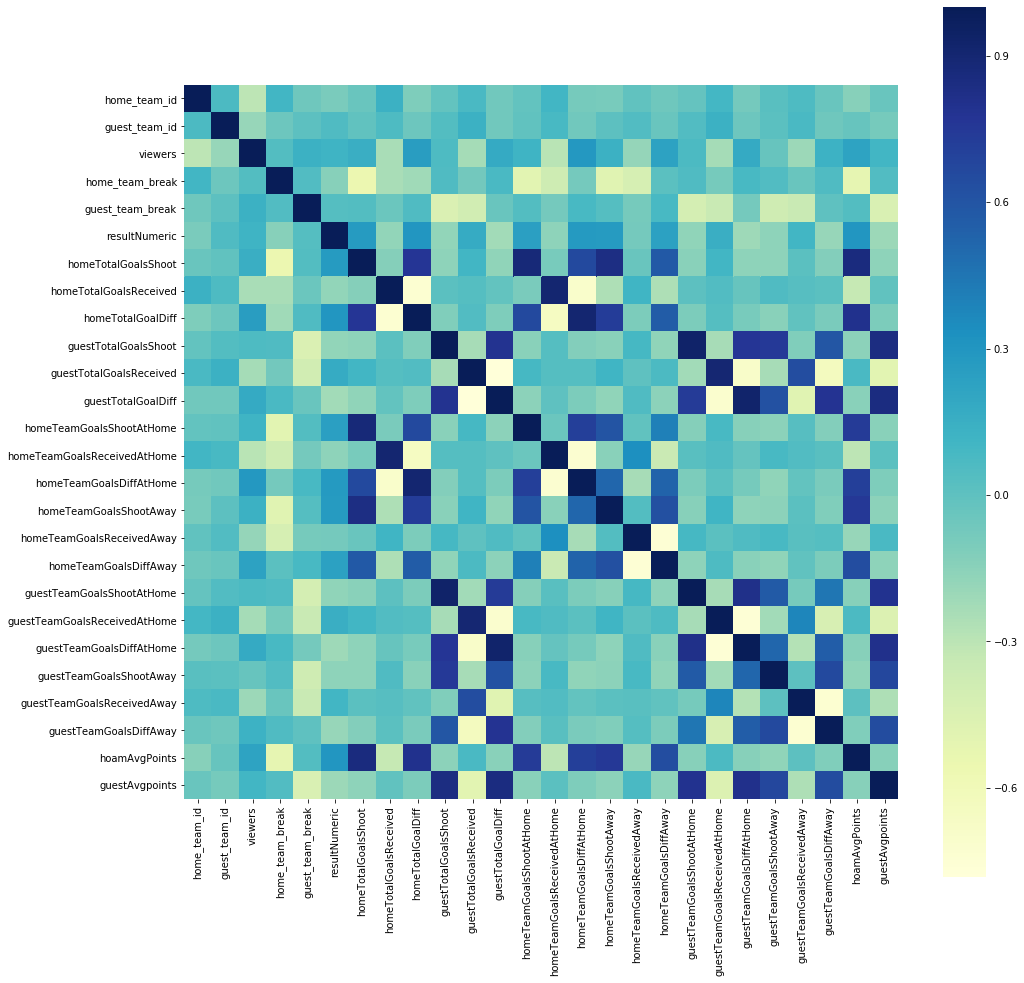

In [291]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_final.corr(), square=True, cmap="YlGnBu")
plt.show()

In [253]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 41 columns):
competition                     5067 non-null object
saison                          5067 non-null object
gameday                         5067 non-null object
date                            5067 non-null datetime64[ns]
home_team_name                  5067 non-null object
guest_team_name                 5067 non-null object
home_coach                      5067 non-null object
home_game_system                5067 non-null object
home_team_id                    5067 non-null int64
guest_coach                     5067 non-null object
guest_game_system               5067 non-null object
guest_team_id                   5067 non-null int64
time                            5067 non-null object
viewers                         5067 non-null int64
weekday                         5067 non-null object
day                             5067 non-null object
month                           5067 non

In [255]:
df_final.home_team_break.describe()

count     5067.000000
mean      1595.050128
std       7858.172087
min          0.000000
25%          4.000000
50%          7.000000
75%          9.000000
max      43531.000000
Name: home_team_break, dtype: float64

In [256]:
from matplotlib import pyplot as plt

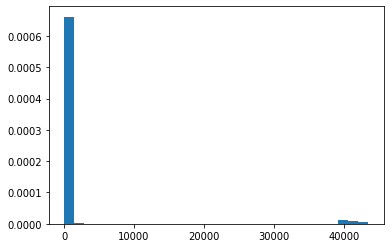

In [257]:
plt.hist(df_final.home_team_break, bins=30, density=True)
plt.show()

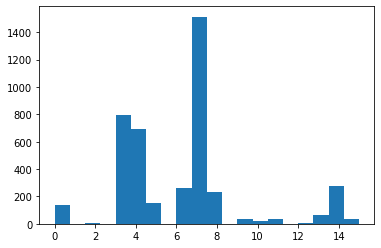

In [258]:
plt.hist(df_final.home_team_break[df_final.home_team_break < 16], bins=20)
plt.show()

In [259]:
from keras.utils import to_categorical

In [260]:
df_final.home_team_break[df_final.home_team_break <= 15].groupby(df_final.home_team_break).count()

home_team_break
0      137
2        7
3      796
4      691
5      152
6      259
7     1513
8      231
9       33
10      22
11      32
12       3
13      63
14     273
15      36
Name: home_team_break, dtype: int64

In [293]:
df_final.home_team_break[df_final.home_team_break >= 16] = 'higher15'

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [294]:
pd.get_dummies(df_final.home_team_break).head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,higher15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [295]:
df_home_team_break = pd.get_dummies(df_final.home_team_break)

In [296]:
df_home_team_break.columns = [
     'htb_0',
     'htb_2',
     'htb_3',
     'htb_4',
     'htb_5',
     'htb_6',
     'htb_7',
     'htb_8',
     'htb_9',
     'htb_10',
     'htb_11',
     'htb_12',
     'htb_13',
     'htb_14',
     'htb_15',
     'htb_>15']


In [297]:
df_final.guest_team_break[df_final.guest_team_break >= 16] = 'higher15'

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [298]:
df_guest_team_break = pd.get_dummies(df_final.guest_team_break)

In [299]:
df_guest_team_break.columns = [
     'gtb_0',
     'gtb_2',
     'gtb_3',
     'gtb_4',
     'gtb_5',
     'gtb_6',
     'gtb_7',
     'gtb_8',
     'gtb_9',
     'gtb_10',
     'gtb_11',
     'gtb_12',
     'gtb_13',
     'gtb_14',
     'gtb_15',
     'gtb_>15']


In [300]:
df_final = pd.concat(
    [df_final,
     pd.get_dummies(df_home_team_break),
     pd.get_dummies(df_guest_team_break)
    ], axis=1)

In [301]:
df_final.isna().sum().sum()

0

In [302]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 73 columns):
competition                     5067 non-null object
saison                          5067 non-null object
gameday                         5067 non-null object
date                            5067 non-null datetime64[ns]
home_team_name                  5067 non-null object
guest_team_name                 5067 non-null object
home_coach                      5067 non-null object
home_game_system                5067 non-null object
home_team_id                    5067 non-null int64
guest_coach                     5067 non-null object
guest_game_system               5067 non-null object
guest_team_id                   5067 non-null int64
time                            5067 non-null object
viewers                         5067 non-null int64
weekday                         5067 non-null object
day                             5067 non-null object
month                           5067 non

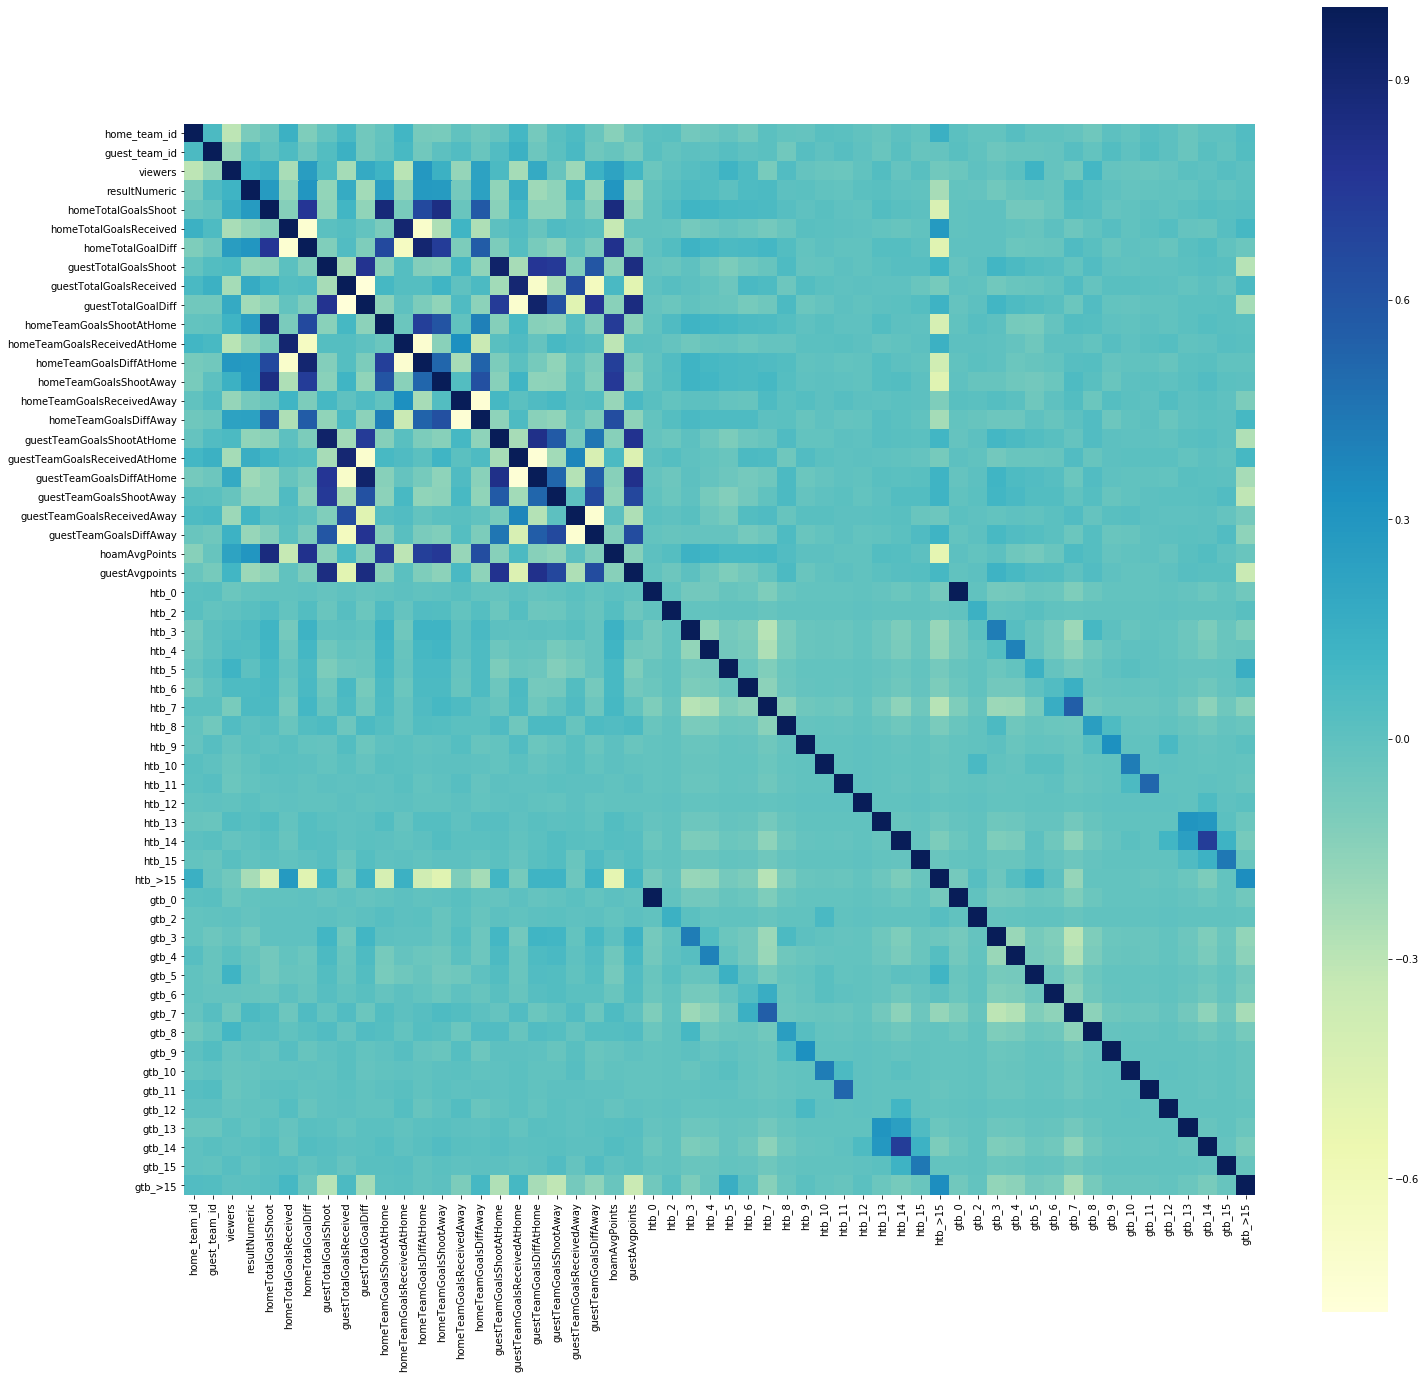

In [303]:
plt.figure(figsize=(24, 24))
sns.heatmap(df_final.corr(), square=True, cmap="YlGnBu")
plt.show()

In [304]:
df_final.to_csv('df_final.csv')